# Predicting Industrial Machine Downtime: Level 1

## 📖 Background
You work for a manufacturer of high-precision metal components used in aerospace, automotives, and medical device applications. Your company operates three different machines on its shop floor that produce different sized components, so minimizing the downtime of these machines is vital for meeting production deadlines.

Your team wants to use a data-driven approach to predicting machine downtime, so proactive maintenance can be planned rather than being reactive to machine failure. To support this, your company has been collecting operational data for over a year and whether each machine was down at those times.

In this first level, you're going to explore and describe the data. This level is aimed towards beginners. If you want to challenge yourself a bit more, check out level two!

## 💾 The data

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

#### Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

# Data Loading and Overview 

First, we load the dataset and take a preliminary look to understand its structure.

In [1]:
import pandas as pd

# Load the dataset
downtime = pd.read_csv('data/machine_downtime.csv')

# Display the first few rows
downtime.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


## 1. Date Range of Data Collection

**Objective:** Identify the first and last dates when readings were taken.

**Approach:**

- Convert the 'Date' column to datetime format for accurate comparison.
- Use **min()** and **max()** functions to find the earliest and latest dates.

In [2]:
# Convert 'Date' column to datetime
downtime['Date'] = pd.to_datetime(downtime['Date'])

# Find the first and last dates
first_date = downtime['Date'].min()
last_date = downtime['Date'].max()

print(f"First Date of Readings: {first_date.date()}")
print(f"Last Date of Readings: {last_date.date()}")

First Date of Readings: 2021-11-24
Last Date of Readings: 2022-07-03


dataset spans approximately 7.5 months, providing a substantial period to analyze machine performance and downtime patterns. This duration allows for the identification of both short-term and emerging trends, which is crucial for effective maintenance planning.

## 2. Average Torque Generated

**Objective:** Calculate the average torque across all machines and days to understand typical operational performance.

**Approach:**

- Use the **mean()** function on the 'Torque(Nm)' column.
- Handle any missing values appropriately to ensure accuracy.

In [3]:
# Calculate average Torque
average_torque = downtime['Torque(Nm)'].mean()

print(f"Average Torque: {average_torque:.2f} Nm")

Average Torque: 25.23 Nm


An average torque of 25.23 Nm suggests the typical operational load the machines handle daily. Monitoring this metric is essential to ensure machines operate within safe and efficient torque ranges, potentially preventing excessive wear or mechanical failures.

## 3. Assembly Line with Highest Downtime Readings

**Objective:** Determine which assembly line experiences the most downtime to prioritize maintenance and resource allocation.

**Approach:**

- Group data by 'Assembly_Line_No' and count the number of downtime occurrences.
- Identify the assembly line with the highest count.

In [13]:
# Group by Assembly Line and count Downtime occurrences
downtime_counts = downtime.groupby('Assembly_Line_No')['Downtime'].apply(lambda x: (x == 'Machine_Failure').sum())

# Identify the assembly line with the highest downtime
max_downtime_line = downtime_counts.idxmax()
max_downtime_count = downtime_counts.max()

print(f"Assembly Line with Highest Downtime: {max_downtime_line} ({max_downtime_count} downtimes)")

Assembly Line with Highest Downtime: Shopfloor-L1 (454 downtimes)


**Shopfloor-L1** has the highest number of downtimes, totaling 454 occurrences. This indicates that machines on this assembly line may require more frequent maintenance or investigation into underlying issues causing these downtimes. Prioritizing Shopfloor-L1 for proactive maintenance could significantly reduce overall downtime and enhance production efficiency.

## 4. Additional Verification

In [14]:
# Calculate total downtimes across all assembly lines
total_downtimes = downtime_counts.sum()
print(f"Total Downtimes Across All Assembly Lines: {total_downtimes}")

Total Downtimes Across All Assembly Lines: 1265


# Visualizations

To further illustrate our findings, the following visualizations provide clear insights:

## 1. Torque Distribution Across Machines

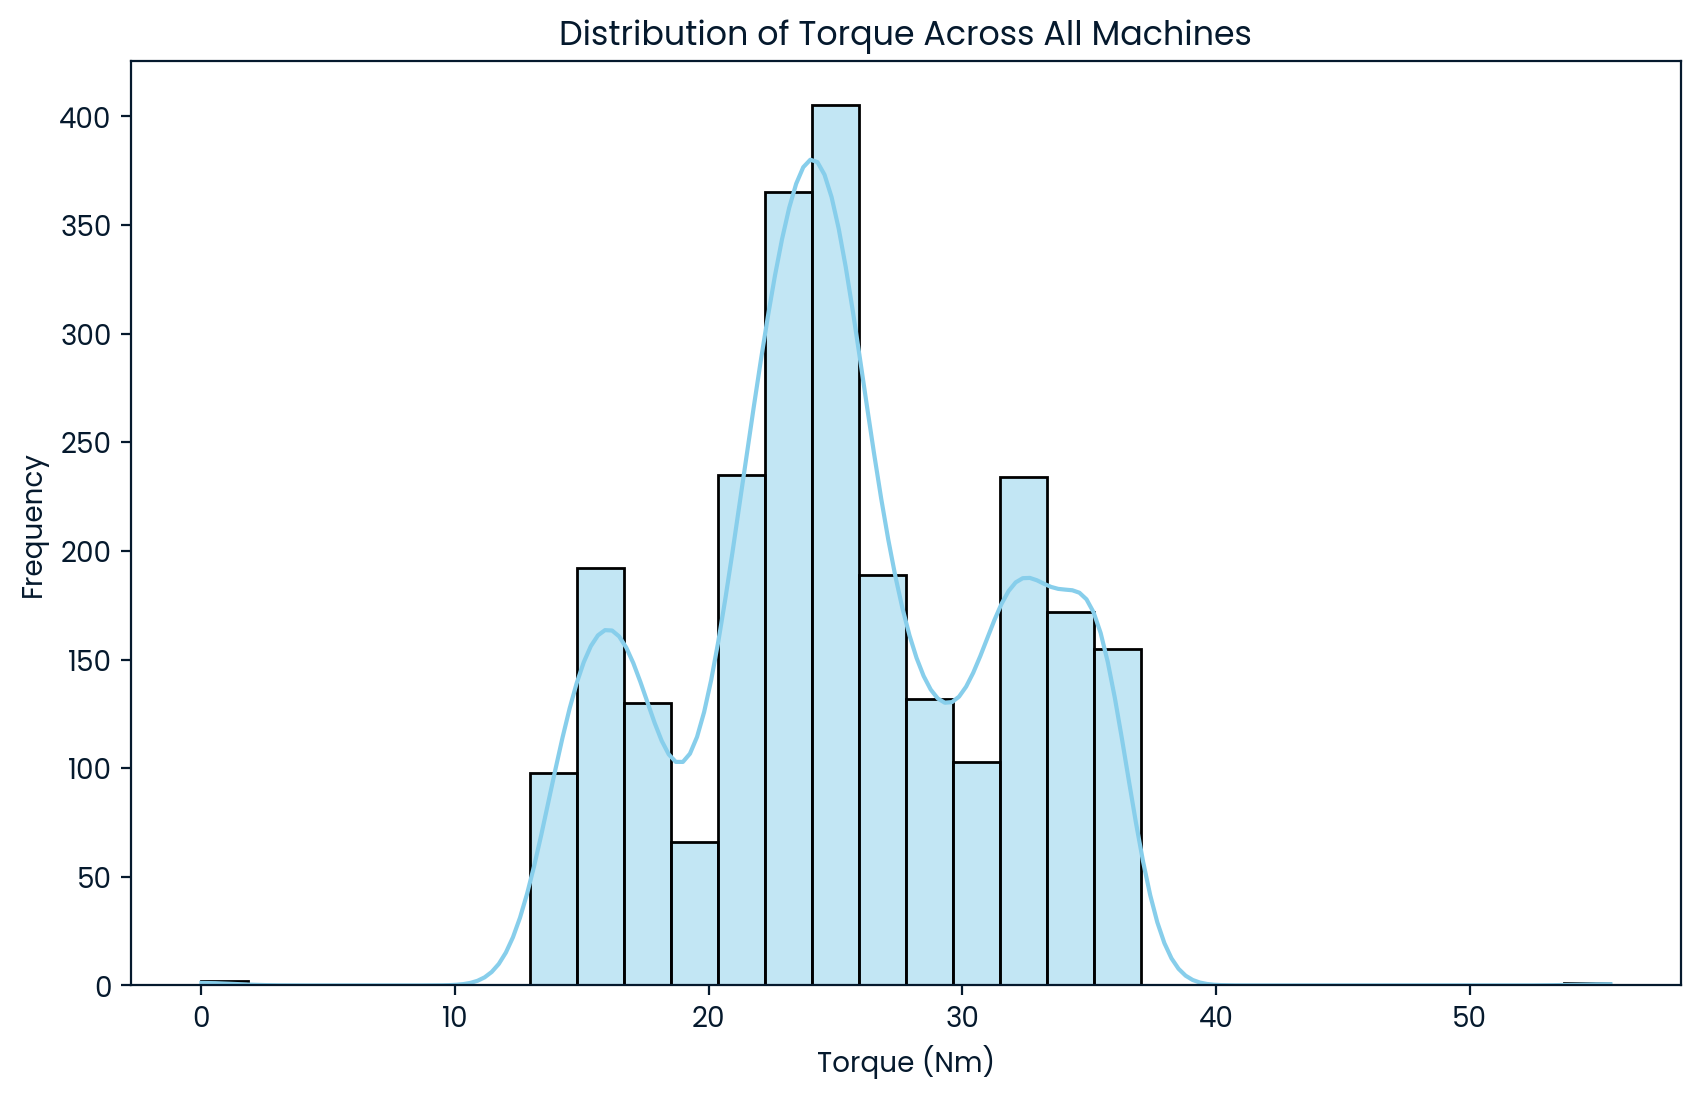

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(downtime['Torque(Nm)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Torque Across All Machines')
plt.xlabel('Torque (Nm)')
plt.ylabel('Frequency')
plt.show()

## 2. Downtime Count per Assembly Line

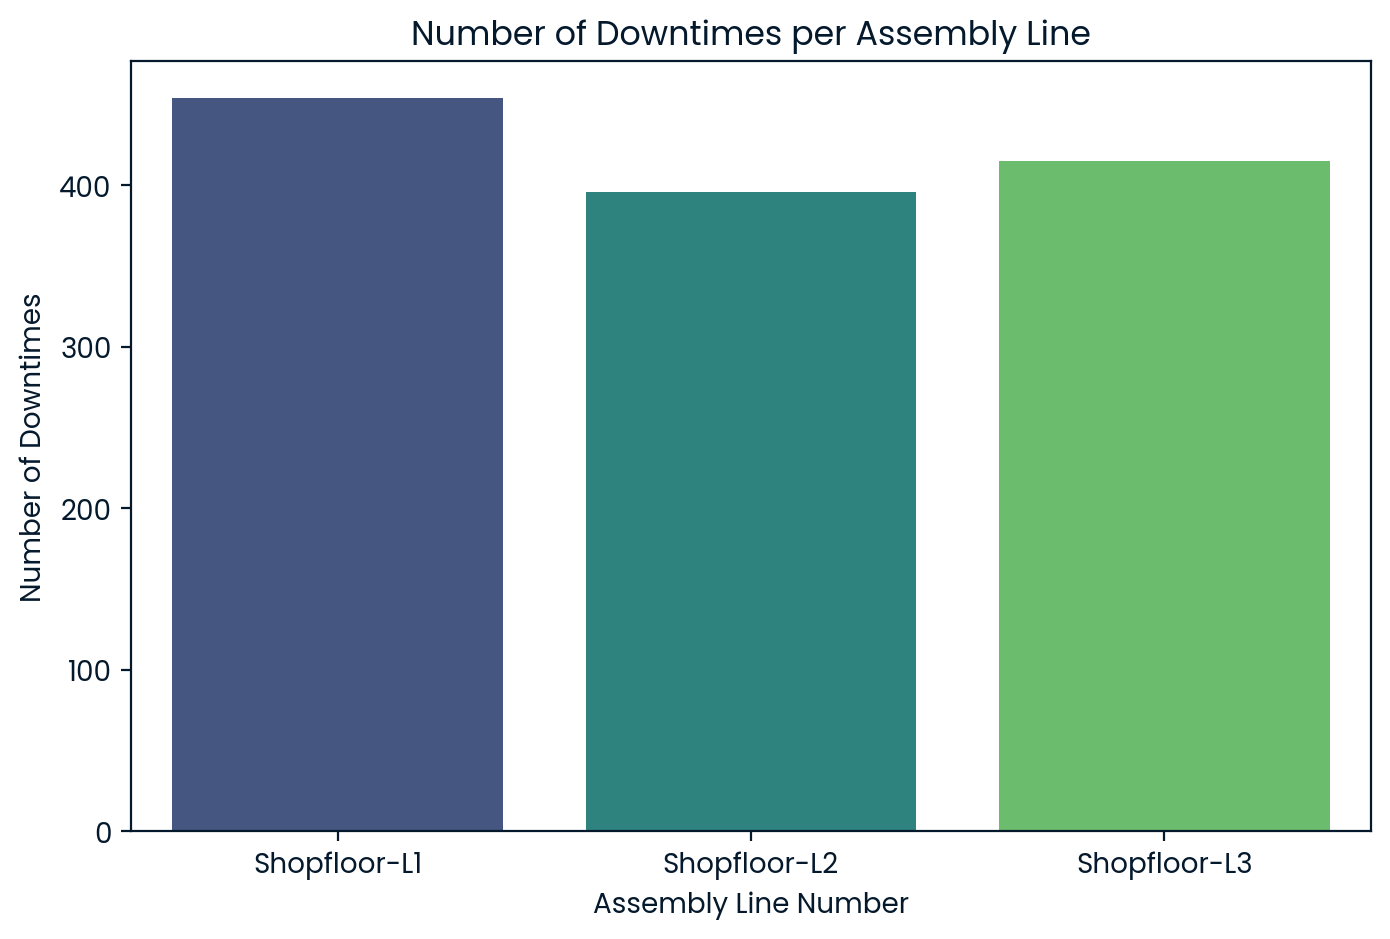

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=downtime_counts.index, y=downtime_counts.values, palette='viridis')
plt.title('Number of Downtimes per Assembly Line')
plt.xlabel('Assembly Line Number')
plt.ylabel('Number of Downtimes')
plt.show()

## Recommendations

Based on the analysis, the following recommendations are proposed to minimize machine downtime and enhance overall production efficiency:

### 1. Prioritize Maintenance for Shopfloor-L1

**Rationale:**  
Shopfloor-L1 exhibits the highest number of downtimes (454), indicating potential underlying issues such as mechanical wear, operational stress, or inadequate maintenance practices.

**Action Steps:**
- Conduct a detailed inspection of machines on Shopfloor-L1 to identify common failure points.
- Implement a more frequent preventive maintenance schedule.
- Train operators on best practices to minimize operational stress on these machines.

### 2. Monitor and Optimize Torque Levels

**Rationale:**  
The average torque is 25.23 Nm. Understanding torque variability can help in identifying machines operating beyond optimal ranges, leading to unnecessary wear and potential failures.

**Action Steps:**
- Continuously monitor torque levels to ensure they remain within manufacturer-specified limits.
- Investigate instances where torque deviates significantly from the average to prevent potential failures.
- Adjust operational parameters to optimize torque usage without compromising production quality.

### 3. Expand Data Collection for Enhanced Insights

**Rationale:**  
The current dataset spans 7.5 months, which provides a solid foundation for analysis. Extending data collection can help in identifying long-term trends and the impact of seasonal variations on machine performance.

**Action Steps:**
- Continue data collection to build a more extensive dataset.
- Incorporate additional variables, such as maintenance logs and operator details, to enrich the analysis.

### 4. Implement Proactive Maintenance Scheduling

**Rationale:**  
Transitioning from reactive to proactive maintenance can significantly reduce unexpected downtimes.

**Action Steps:**
- Utilize predictive analytics to forecast potential downtimes based on historical data.
- Schedule maintenance activities during planned downtimes to minimize disruption to production.

## Conclusion

The initial data exploration highlights critical areas for improvement in machine maintenance and operational efficiency. By focusing on the assembly line with the highest downtime and monitoring key performance metrics like torque, the company can implement targeted strategies to minimize downtime, enhance machine longevity, and ensure timely fulfillment of production deadlines. Future analyses, incorporating more variables and extended timeframes, will further support data-driven decision-making for proactive maintenance planning.